In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('MarathonData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
id               87 non-null int64
Marathon         87 non-null object
Name             87 non-null object
Category         81 non-null object
km4week          87 non-null float64
sp4week          87 non-null float64
CrossTraining    13 non-null object
Wall21           87 non-null object
MarathonTime     87 non-null float64
CATEGORY         87 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 4.8+ KB


In [4]:
df.describe()

,id,km4week,sp4week,MarathonTime
count,87.000000,87.000000,87.000000,87.000000
mean,44.000000,62.347126,139.840706,3.319080
std,25.258662,26.956019,1191.427864,0.376923
min,1.000000,17.900000,8.031414,2.370000
25%,22.500000,44.200000,11.498168,3.045000
50%,44.000000,58.800000,12.163424,3.320000
75%,65.500000,77.500000,12.854036,3.605000
max,87.000000,137.500000,11125.000000,3.980000


In [5]:
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [6]:
df.isna().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

In [7]:
df.Marathon.unique().sum()

'Prague17'

In [8]:
df.Marathon.nunique()

1

In [9]:
df[df.duplicated()].sum()

id               0.0
Marathon         0.0
Name             0.0
Category         0.0
km4week          0.0
sp4week          0.0
CrossTraining    0.0
Wall21           0.0
MarathonTime     0.0
CATEGORY         0.0
dtype: float64

In [10]:
df.columns

Index([u'id', u'Marathon', u'Name', u'Category', u'km4week', u'sp4week',
       u'CrossTraining', u'Wall21', u'MarathonTime', u'CATEGORY'],
      dtype='object')

In [11]:
df.shape

(87, 10)

In [12]:
df.head(4)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A


In [13]:
df.CATEGORY.unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [14]:
df.Marathon.unique()

array(['Prague17'], dtype=object)

In [15]:
df.Category.unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', nan, 'WAM'], dtype=object)

In [16]:
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [17]:
df[df.Category.isnull()].Category

25    NaN
34    NaN
51    NaN
53    NaN
73    NaN
80    NaN
Name: Category, dtype: object

In [18]:
##Filling the NaN From Category Column with UNKNOWN

In [19]:
df['Category'].fillna(value = "UNKNOWN",inplace = True)

In [20]:
df[df.Category.isnull()].Category

Series([], Name: Category, dtype: object)

In [21]:
df[df.CrossTraining.isnull()].CrossTraining

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
9     NaN
10    NaN
11    NaN
13    NaN
14    NaN
15    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
26    NaN
27    NaN
28    NaN
29    NaN
31    NaN
32    NaN
33    NaN
34    NaN
     ... 
50    NaN
51    NaN
52    NaN
53    NaN
54    NaN
55    NaN
56    NaN
57    NaN
58    NaN
59    NaN
60    NaN
61    NaN
62    NaN
64    NaN
65    NaN
67    NaN
68    NaN
69    NaN
70    NaN
72    NaN
73    NaN
74    NaN
77    NaN
78    NaN
79    NaN
80    NaN
81    NaN
82    NaN
84    NaN
85    NaN
Name: CrossTraining, Length: 74, dtype: object

In [22]:
##Filling the NaN From CrossTraining Column with the value as UNKNOWN

In [23]:
df['CrossTraining'].fillna(value = "UNKNOWN",inplace = True)

In [24]:
df[df.CrossTraining.isnull()].CrossTraining

Series([], Name: CrossTraining, dtype: object)

In [25]:
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,UNKNOWN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,UNKNOWN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,UNKNOWN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,UNKNOWN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,UNKNOWN,1.36,2.74,A


In [26]:
df.isna().sum()

id               0
Marathon         0
Name             0
Category         0
km4week          0
sp4week          0
CrossTraining    0
Wall21           0
MarathonTime     0
CATEGORY         0
dtype: int64

In [27]:
df.corr()

,id,km4week,sp4week,MarathonTime
id,1.000000,-0.599675,0.162553,0.991548
km4week,-0.599675,1.000000,-0.107429,-0.606782
sp4week,0.162553,-0.107429,1.000000,0.172294
MarathonTime,0.991548,-0.606782,0.172294,1.000000


In [28]:
##Handling the String data of the Column Category using One hot Encoder

In [29]:
df.Category.unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'UNKNOWN', 'WAM'], dtype=object)

In [30]:
pd.get_dummies(df.Category,prefix = "Category")

,Category_M40,Category_M45,Category_M50,Category_M55,Category_MAM,Category_UNKNOWN,Category_WAM
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0
8,0,0,0,0,1,0,0
9,0,1,0,0,0,0,0


In [31]:
Category_dummies = pd.get_dummies(df.Category,prefix = "Category").iloc[:,0:]

In [32]:
df = pd.concat([df,Category_dummies],axis = 1)
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,Category_M40,Category_M45,Category_M50,Category_M55,Category_MAM,Category_UNKNOWN,Category_WAM
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,UNKNOWN,1.16,2.37,A,0,0,0,0,1,0,0
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,UNKNOWN,1.23,2.59,A,0,0,0,0,1,0,0
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,UNKNOWN,1.30,2.66,A,0,0,0,0,1,0,0
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,UNKNOWN,1.32,2.68,A,0,1,0,0,0,0,0
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,UNKNOWN,1.36,2.74,A,0,0,0,0,1,0,0


In [33]:
df.columns

Index([u'id', u'Marathon', u'Name', u'Category', u'km4week', u'sp4week',
       u'CrossTraining', u'Wall21', u'MarathonTime', u'CATEGORY',
       u'Category_M40', u'Category_M45', u'Category_M50', u'Category_M55',
       u'Category_MAM', u'Category_UNKNOWN', u'Category_WAM'],
      dtype='object')

In [34]:
##df['NewCategory']=df['Category_M40']+df['Category_M45']+df['Category_M50']+df['Category_M55']+df['Category_MAM']+df['Category_UNKNOWN']+df['Category_WAM']

In [35]:
##df=df.drop('NewCategory',axis=1)

In [36]:
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,Category_M40,Category_M45,Category_M50,Category_M55,Category_MAM,Category_UNKNOWN,Category_WAM
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,UNKNOWN,1.16,2.37,A,0,0,0,0,1,0,0
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,UNKNOWN,1.23,2.59,A,0,0,0,0,1,0,0
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,UNKNOWN,1.30,2.66,A,0,0,0,0,1,0,0
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,UNKNOWN,1.32,2.68,A,0,1,0,0,0,0,0
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,UNKNOWN,1.36,2.74,A,0,0,0,0,1,0,0


In [37]:
df.columns

Index([u'id', u'Marathon', u'Name', u'Category', u'km4week', u'sp4week',
       u'CrossTraining', u'Wall21', u'MarathonTime', u'CATEGORY',
       u'Category_M40', u'Category_M45', u'Category_M50', u'Category_M55',
       u'Category_MAM', u'Category_UNKNOWN', u'Category_WAM'],
      dtype='object')

In [38]:
df.isna().sum()

id                  0
Marathon            0
Name                0
Category            0
km4week             0
sp4week             0
CrossTraining       0
Wall21              0
MarathonTime        0
CATEGORY            0
Category_M40        0
Category_M45        0
Category_M50        0
Category_M55        0
Category_MAM        0
Category_UNKNOWN    0
Category_WAM        0
dtype: int64

In [39]:
##Handling the String data of the Column CrossTraining using One hot Encoder

In [40]:
df.CrossTraining.unique()

array(['UNKNOWN', 'ciclista 1h', 'ciclista 4h', 'ciclista 13h',
       'ciclista 5h', 'ciclista 3h'], dtype=object)

In [41]:
pd.get_dummies(df.CrossTraining,prefix = "CrossTraining")

,CrossTraining_UNKNOWN,CrossTraining_ciclista 13h,CrossTraining_ciclista 1h,CrossTraining_ciclista 3h,CrossTraining_ciclista 4h,CrossTraining_ciclista 5h
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,0,0,1,0,0,0
9,1,0,0,0,0,0


In [42]:
CrossTraining_dummies = pd.get_dummies(df.CrossTraining,prefix = "CrossTraining").iloc[:,0:]

In [43]:
df = pd.concat([df,CrossTraining_dummies],axis = 1)
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,...,Category_M55,Category_MAM,Category_UNKNOWN,Category_WAM,CrossTraining_UNKNOWN,CrossTraining_ciclista 13h,CrossTraining_ciclista 1h,CrossTraining_ciclista 3h,CrossTraining_ciclista 4h,CrossTraining_ciclista 5h
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,UNKNOWN,1.16,2.37,A,...,0,1,0,0,1,0,0,0,0,0
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,UNKNOWN,1.23,2.59,A,...,0,1,0,0,1,0,0,0,0,0
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,UNKNOWN,1.30,2.66,A,...,0,1,0,0,1,0,0,0,0,0
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,UNKNOWN,1.32,2.68,A,...,0,0,0,0,1,0,0,0,0,0
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,UNKNOWN,1.36,2.74,A,...,0,1,0,0,1,0,0,0,0,0


In [44]:
##df['NewCrossTraining']=df['CrossTraining_UNKNOWN']+df['CrossTraining_ciclista 13h']+df['CrossTraining_ciclista 1h']+df['CrossTraining_ciclista 3h']+df['CrossTraining_ciclista 4h']+df['CrossTraining_ciclista 5h']

In [45]:
df.columns

Index([u'id', u'Marathon', u'Name', u'Category', u'km4week', u'sp4week',
       u'CrossTraining', u'Wall21', u'MarathonTime', u'CATEGORY',
       u'Category_M40', u'Category_M45', u'Category_M50', u'Category_M55',
       u'Category_MAM', u'Category_UNKNOWN', u'Category_WAM',
       u'CrossTraining_UNKNOWN', u'CrossTraining_ciclista 13h',
       u'CrossTraining_ciclista 1h', u'CrossTraining_ciclista 3h',
       u'CrossTraining_ciclista 4h', u'CrossTraining_ciclista 5h'],
      dtype='object')

In [46]:
##df['NewCrossTraining'].dtypes

KeyError: 'NewCrossTraining'

In [ ]:
df.corr()

In [47]:
##Handling the String data of the Column CATEGORY using Label Encoder

In [48]:
df.columns

Index([u'id', u'Marathon', u'Name', u'Category', u'km4week', u'sp4week',
       u'CrossTraining', u'Wall21', u'MarathonTime', u'CATEGORY',
       u'Category_M40', u'Category_M45', u'Category_M50', u'Category_M55',
       u'Category_MAM', u'Category_UNKNOWN', u'Category_WAM',
       u'CrossTraining_UNKNOWN', u'CrossTraining_ciclista 13h',
       u'CrossTraining_ciclista 1h', u'CrossTraining_ciclista 3h',
       u'CrossTraining_ciclista 4h', u'CrossTraining_ciclista 5h'],
      dtype='object')

In [49]:
df.CATEGORY.unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [50]:
df["CATEGORY"] = df.CATEGORY.map({"A" : 1,"B":2, "C" : 3, "D" : 4})
df.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY,...,Category_M55,Category_MAM,Category_UNKNOWN,Category_WAM,CrossTraining_UNKNOWN,CrossTraining_ciclista 13h,CrossTraining_ciclista 1h,CrossTraining_ciclista 3h,CrossTraining_ciclista 4h,CrossTraining_ciclista 5h
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,UNKNOWN,1.16,2.37,1,...,0,1,0,0,1,0,0,0,0,0
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,UNKNOWN,1.23,2.59,1,...,0,1,0,0,1,0,0,0,0,0
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,UNKNOWN,1.30,2.66,1,...,0,1,0,0,1,0,0,0,0,0
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,UNKNOWN,1.32,2.68,1,...,0,0,0,0,1,0,0,0,0,0
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,UNKNOWN,1.36,2.74,1,...,0,1,0,0,1,0,0,0,0,0


In [51]:
df.CATEGORY.unique()

array([1, 2, 3, 4], dtype=int64)

In [52]:
df.corr()

,id,km4week,sp4week,MarathonTime,CATEGORY,Category_M40,Category_M45,Category_M50,Category_M55,Category_MAM,Category_UNKNOWN,Category_WAM,CrossTraining_UNKNOWN,CrossTraining_ciclista 13h,CrossTraining_ciclista 1h,CrossTraining_ciclista 3h,CrossTraining_ciclista 4h,CrossTraining_ciclista 5h
id,1.000000,-0.599675,0.162553,0.991548,0.963288,0.030292,-0.093299,-0.061191,0.025084,0.000918,0.104763,0.024039,-0.123249,-0.115935,-0.150286,0.155359,0.003054,0.170461
km4week,-0.599675,1.000000,-0.107429,-0.606782,-0.545770,-0.083572,0.081399,0.118386,0.080054,-0.099553,-0.041607,0.103027,0.314721,0.200986,0.030791,-0.230776,-0.135344,-0.300387
sp4week,0.162553,-0.107429,1.000000,0.172294,0.164002,-0.049277,-0.049149,-0.023651,-0.020382,0.116919,-0.029358,-0.023775,0.045277,-0.011583,-0.011476,-0.026781,-0.016417,-0.023827
MarathonTime,0.991548,-0.606782,0.172294,1.000000,0.958870,0.036035,-0.084138,-0.050719,0.027359,-0.019892,0.119290,0.016648,-0.126638,-0.117711,-0.140731,0.154794,0.004470,0.171885
CATEGORY,0.963288,-0.545770,0.164002,0.958870,1.000000,0.032841,-0.111462,-0.029317,-0.010301,-0.013829,0.157256,0.022736,-0.119858,-0.142244,-0.142244,0.142677,0.015886,0.178896
Category_M40,0.030292,-0.083572,-0.049277,0.036035,0.032841,1.000000,-0.208333,-0.100201,-0.086258,-0.421076,-0.124226,-0.100201,-0.064751,-0.049219,-0.049219,0.148775,-0.070014,0.045090
Category_M45,-0.093299,0.081399,-0.049149,-0.084138,-0.111462,-0.208333,1.000000,-0.100201,-0.086258,-0.421076,-0.124226,-0.100201,0.105956,-0.049219,-0.049219,-0.112709,0.133027,-0.100201
Category_M50,-0.061191,0.118386,-0.023651,-0.050719,-0.029317,-0.100201,-0.100201,1.000000,-0.041487,-0.202522,-0.059748,-0.048193,-0.061931,-0.023672,-0.023672,0.181599,-0.033674,-0.048193
Category_M55,0.025084,0.080054,-0.020382,0.027359,-0.010301,-0.086258,-0.086258,-0.041487,1.000000,-0.174342,-0.051434,-0.041487,-0.097489,0.570597,-0.020378,-0.046666,-0.028989,-0.041487
Category_MAM,0.000918,-0.099553,0.116919,-0.019892,-0.013829,-0.421076,-0.421076,-0.202522,-0.174342,1.000000,-0.251081,-0.202522,-0.001487,-0.099479,0.116888,-0.029614,0.012382,0.017721


In [53]:
##Replacing '-' in Wall21 with the NAN

In [54]:
df.describe(include = ['object'])

,Marathon,Name,Category,CrossTraining,Wall21
count,87,87,87,87,87
unique,1,86,7,6,52
top,Prague17,Tomas Drabek,MAM,UNKNOWN,-
freq,87,2,40,74,6


In [55]:
df.Wall21=df.Wall21.apply( lambda x: x.replace('-','NaN'))
df.describe(include = ['object'])

,Marathon,Name,Category,CrossTraining,Wall21
count,87,87,87,87,87
unique,1,86,7,6,52
top,Prague17,Tomas Drabek,MAM,UNKNOWN,NaN
freq,87,2,40,74,6


In [56]:
df.isna().sum()

id                            0
Marathon                      0
Name                          0
Category                      0
km4week                       0
sp4week                       0
CrossTraining                 0
Wall21                        0
MarathonTime                  0
CATEGORY                      0
Category_M40                  0
Category_M45                  0
Category_M50                  0
Category_M55                  0
Category_MAM                  0
Category_UNKNOWN              0
Category_WAM                  0
CrossTraining_UNKNOWN         0
CrossTraining_ciclista 13h    0
CrossTraining_ciclista 1h     0
CrossTraining_ciclista 3h     0
CrossTraining_ciclista 4h     0
CrossTraining_ciclista 5h     0
dtype: int64

In [57]:
df.Wall21=df.Wall21.apply( lambda x: x.replace('NaN','0'))
df.describe(include = ['object'])

,Marathon,Name,Category,CrossTraining,Wall21
count,87,87,87,87,87
unique,1,86,7,6,52
top,Prague17,Tomas Drabek,MAM,UNKNOWN,0
freq,87,2,40,74,6


In [58]:
df.Wall21.median()

1.61

In [59]:
##Replacing the Wall21 0 with Median

In [60]:
df.Wall21 = df.Wall21.astype(float)
df.dtypes

id                              int64
Marathon                       object
Name                           object
Category                       object
km4week                       float64
sp4week                       float64
CrossTraining                  object
Wall21                        float64
MarathonTime                  float64
CATEGORY                        int64
Category_M40                    uint8
Category_M45                    uint8
Category_M50                    uint8
Category_M55                    uint8
Category_MAM                    uint8
Category_UNKNOWN                uint8
Category_WAM                    uint8
CrossTraining_UNKNOWN           uint8
CrossTraining_ciclista 13h      uint8
CrossTraining_ciclista 1h       uint8
CrossTraining_ciclista 3h       uint8
CrossTraining_ciclista 4h       uint8
CrossTraining_ciclista 5h       uint8
dtype: object

In [61]:
df.describe(include = ['object'])

,Marathon,Name,Category,CrossTraining
count,87,87,87,87
unique,1,86,7,6
top,Prague17,Tomas Drabek,MAM,UNKNOWN
freq,87,2,40,74


In [62]:
df["Wall21"] = np.where(df["Wall21"]==0, 1.61,df['Wall21'])

In [63]:
##Outliers Deduction

In [64]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [65]:
df.columns

Index([u'id', u'Marathon', u'Name', u'Category', u'km4week', u'sp4week',
       u'CrossTraining', u'Wall21', u'MarathonTime', u'CATEGORY',
       u'Category_M40', u'Category_M45', u'Category_M50', u'Category_M55',
       u'Category_MAM', u'Category_UNKNOWN', u'Category_WAM',
       u'CrossTraining_UNKNOWN', u'CrossTraining_ciclista 13h',
       u'CrossTraining_ciclista 1h', u'CrossTraining_ciclista 3h',
       u'CrossTraining_ciclista 4h', u'CrossTraining_ciclista 5h'],
      dtype='object')

In [66]:
print("Outliers for km4week")
Year_indices, Year_values = find_outliers_tukey(df['km4week'])
print(np.sort(Year_values))

Outliers for km4week
[129.6 132.8 137.5]


In [67]:
##Replacing the Outliers in the column km4week with Median

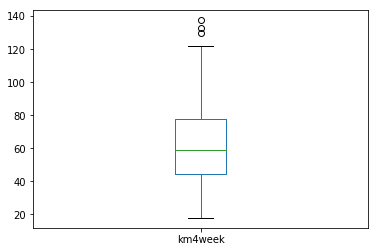

In [68]:
df['km4week'].plot.box()

In [69]:
df["km4week"] = np.where(df["km4week"] >129.6, 58.8,df['km4week'])

In [70]:
df.km4week.median()

58.8

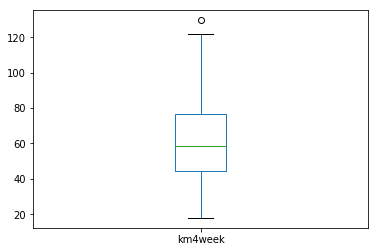

In [71]:
df['km4week'].plot.box()

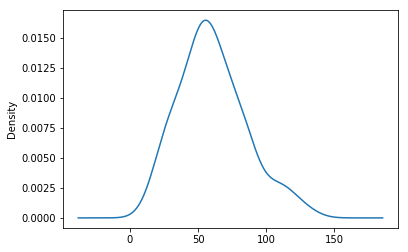

In [72]:
df['km4week'].plot.density()

In [73]:
##Feature Selection

In [74]:
##**Make a list of data frame column names**

In [75]:
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

['id',
 'Marathon',
 'Name',
 'Category',
 'km4week',
 'sp4week',
 'CrossTraining',
 'Wall21',
 'MarathonTime',
 'CATEGORY',
 'Category_M40',
 'Category_M45',
 'Category_M50',
 'Category_M55',
 'Category_MAM',
 'Category_UNKNOWN',
 'Category_WAM',
 'CrossTraining_UNKNOWN',
 'CrossTraining_ciclista 13h',
 'CrossTraining_ciclista 1h',
 'CrossTraining_ciclista 3h',
 'CrossTraining_ciclista 4h',
 'CrossTraining_ciclista 5h']

In [76]:
##**Put all the numerical features in X and Marathon Timin in y and ignoring the string Column as linear regression accepts only Nums

In [77]:
X = df[l_column[0:len_feature-1]]
X.columns

Index([u'id', u'Marathon', u'Name', u'Category', u'km4week', u'sp4week',
       u'CrossTraining', u'Wall21', u'MarathonTime', u'CATEGORY',
       u'Category_M40', u'Category_M45', u'Category_M50', u'Category_M55',
       u'Category_MAM', u'Category_UNKNOWN', u'Category_WAM',
       u'CrossTraining_UNKNOWN', u'CrossTraining_ciclista 13h',
       u'CrossTraining_ciclista 1h', u'CrossTraining_ciclista 3h',
       u'CrossTraining_ciclista 4h'],
      dtype='object')

In [78]:
df.shape

(87, 23)

In [79]:
##Dropping the Target or Dependent variable from the input

In [80]:
X=X.drop('MarathonTime',axis=1)
X.columns

Index([u'id', u'Marathon', u'Name', u'Category', u'km4week', u'sp4week',
       u'CrossTraining', u'Wall21', u'CATEGORY', u'Category_M40',
       u'Category_M45', u'Category_M50', u'Category_M55', u'Category_MAM',
       u'Category_UNKNOWN', u'Category_WAM', u'CrossTraining_UNKNOWN',
       u'CrossTraining_ciclista 13h', u'CrossTraining_ciclista 1h',
       u'CrossTraining_ciclista 3h', u'CrossTraining_ciclista 4h'],
      dtype='object')

In [81]:
X=X.drop('sp4week',axis=1)
X.columns#x=id,km4week,wall21,CATEGORY, #y=Marathon time

Index([u'id', u'Marathon', u'Name', u'Category', u'km4week', u'CrossTraining',
       u'Wall21', u'CATEGORY', u'Category_M40', u'Category_M45',
       u'Category_M50', u'Category_M55', u'Category_MAM', u'Category_UNKNOWN',
       u'Category_WAM', u'CrossTraining_UNKNOWN',
       u'CrossTraining_ciclista 13h', u'CrossTraining_ciclista 1h',
       u'CrossTraining_ciclista 3h', u'CrossTraining_ciclista 4h'],
      dtype='object')

In [82]:
X=X.drop('Marathon',axis=1)

In [83]:
X=X.drop('Name',axis=1)

In [84]:
X=X.drop('Category',axis=1)

In [85]:
X=X.drop('CrossTraining',axis=1)

In [86]:
X=X.drop('CrossTraining_ciclista 4h',axis=1)
X=X.drop('CrossTraining_ciclista 3h',axis=1)
X=X.drop('CrossTraining_ciclista 1h',axis=1)
X=X.drop('CrossTraining_ciclista 13h',axis=1)
X=X.drop('CrossTraining_UNKNOWN',axis=1)
X=X.drop('Category_WAM',axis=1)
X=X.drop('Category_UNKNOWN',axis=1)
X=X.drop('Category_MAM',axis=1)
X=X.drop('Category_M55',axis=1)
X=X.drop('Category_M50',axis=1)
X=X.drop('Category_M45',axis=1)
X=X.drop('Category_M40',axis=1)

In [87]:
X.columns

Index([u'id', u'km4week', u'Wall21', u'CATEGORY'], dtype='object')

In [88]:
X.shape

(87, 4)

In [89]:
y = df[l_column[len_feature-15]]

In [90]:
y.shape

(87,)

In [91]:
y.head()

0    2.37
1    2.59
2    2.66
3    2.68
4    2.74
Name: MarathonTime, dtype: float64

In [92]:
### Test-train split

In [93]:
##**Import train_test_split function from scikit-learn**

In [94]:
from sklearn.cross_validation import train_test_split

C:\Users\user\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [95]:
##**Create X and y train and test splits in one command using a split ratio and a random seed**

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [97]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

('Training feature set size:', (60, 4))
('Test feature set size:', (27, 4))
('Training variable set size:', (60,))
('Test variable set size:', (27,))


In [98]:
### Model fit and training

In [99]:
##**Import linear regression model estimator from scikit-learn and instantiate**

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [101]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

In [102]:
##**Fit the model on to the instantiated object itself**

In [103]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
##**Check the intercept and coefficients and put them in a DataFrame**

In [105]:
print("The intercept term of the linear model:", lm.intercept_)

('The intercept term of the linear model:', 2.089525503244289)


In [106]:
print("The coefficients of the linear model:", lm.coef_)

('The coefficients of the linear model:', array([1.17254899e-02, 3.78843079e-04, 4.09779532e-01, 8.16716407e-03]))


In [107]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])

In [108]:
cdf

,Coefficients
id,0.011725
km4week,0.000379
Wall21,0.409780
CATEGORY,0.008167


In [109]:
### Calculation of standard errors and t-statistic for the coefficients

In [110]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
id,0.011725,0.000225,52.155536
km4week,0.000379,0.000218,1.738396
Wall21,0.409780,0.027920,14.677091
CATEGORY,0.008167,0.005378,1.518521


In [111]:
##print("Therefore, features arranged in the order of importance for predicting the Marathon Timing\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

id > 
Wall21 > 
km4week > 
CATEGORY


Text(0.5,1,'CATEGORY vs. MarathonTime')

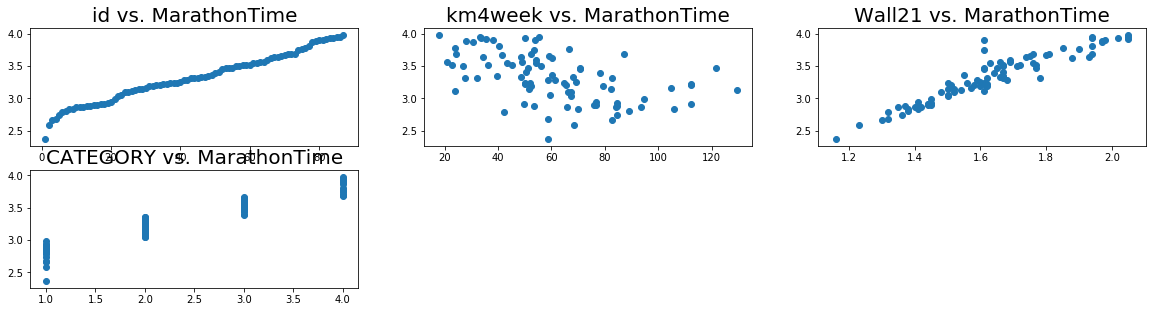

In [112]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(4,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)

ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['MarathonTime'])
ax0.set_title(l[0]+" vs. MarathonTime", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['MarathonTime'])
ax1.set_title(l[1]+" vs. MarathonTime",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['MarathonTime'])
ax2.set_title(l[2]+" vs. MarathonTime",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['MarathonTime'])
ax3.set_title(l[3]+" vs. MarathonTime",fontdict={'fontsize':20})

In [113]:
train_pred = lm.predict(X_train)

In [114]:
metrics.mean_squared_error(y_train,train_pred)

0.0018948361523769578

In [115]:
metrics.mean_absolute_error(y_train,train_pred)

0.02823391654058566

In [116]:
np.sqrt(metrics.mean_squared_error(y_train,train_pred))

0.043529715739675554

In [117]:
##**R-square of the model fit**

In [118]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

('R-squared value of this fit:', 0.988)


In [119]:
### Prediction, error estimate, and regression evaluation matrices

In [120]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

('Type of the predicted object:', <type 'numpy.ndarray'>)
('Size of the predicted object:', (27,))


In [121]:
##**Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

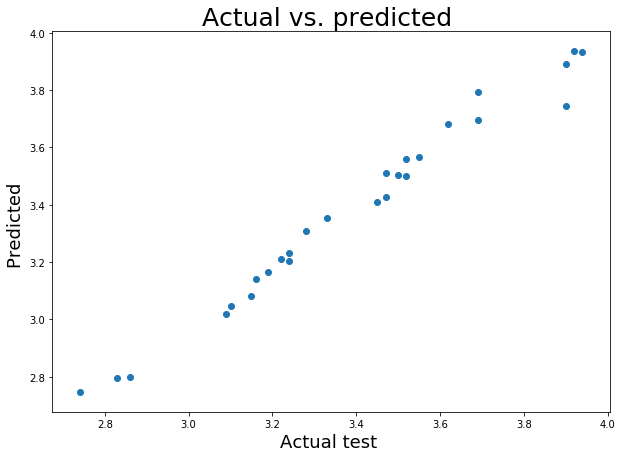

In [122]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted ",fontsize=25)
plt.xlabel("Actual test ",fontsize=18)
plt.ylabel("Predicted ", fontsize=18)
plt.scatter(x=y_test,y=predictions)

In [123]:
##**Plotting histogram of the residuals i.e. predicted errors (expect a normally distributed pattern)**

C:\Users\user\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


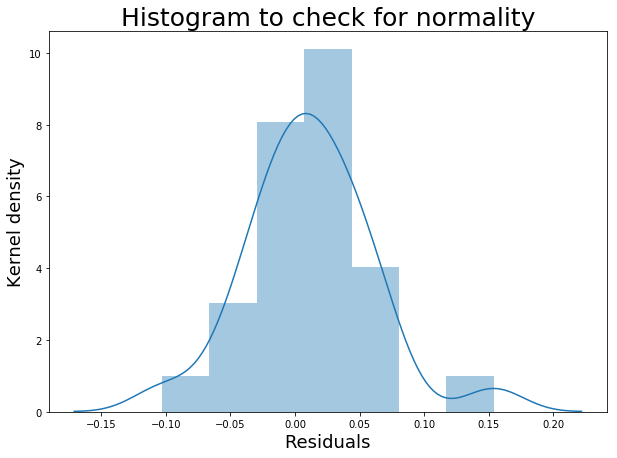

In [124]:
plt.figure(figsize=(10,7))
plt.title("Histogram to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test-predictions])

In [125]:
##**Scatter plot of residuals and predicted values (Homoscedasticity)**

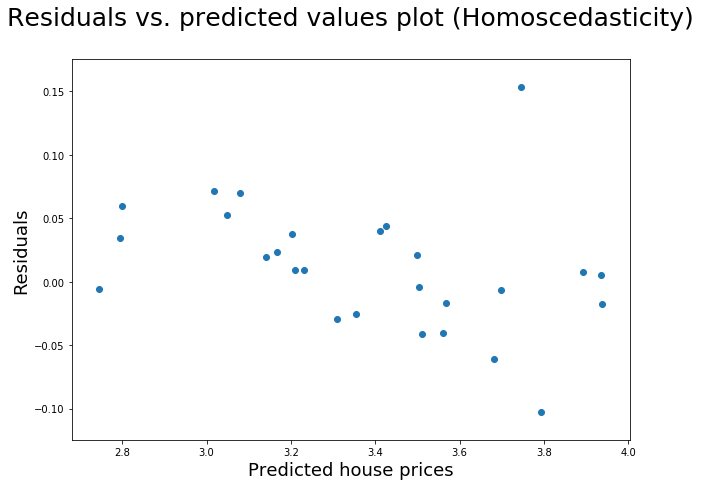

In [126]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

In [127]:
##**Regression evaluation metrices for train**

In [128]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_train,train_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_train,train_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_train,train_pred)))

('Mean absolute error (MAE):', 0.02823391654058566)
('Mean square error (MSE):', 0.0018948361523769578)
('Root mean square error (RMSE):', 0.043529715739675554)


In [129]:
##**Regression evaluation metrices for test**

In [130]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

('Mean absolute error (MAE):', 0.03736767897276381)
('Mean square error (MSE):', 0.0025000848851007003)
('Root mean square error (RMSE):', 0.05000084884380165)


In [131]:
##**R-square value**

In [132]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

('R-squared value of predictions:', 0.976)


In [133]:
##**Mean Absolute Percentage error for y train**

In [134]:
def mean_absolute_percentage_error(y_train, train_pred):
    y_train,train_pred=np.array(y_train),np.array(train_pred)
    return np.mean(np.abs((y_train - train_pred)/y_train))*100

In [135]:
print("Mean absolute percentage error (MAPE):", mean_absolute_percentage_error(y_train,train_pred))

('Mean absolute percentage error (MAPE):', 0.9210358535370271)


In [136]:
##**Mean Absolute Percentage error for y test**

In [137]:
def mean_absolute_percentage_error(y_test, predictions):
    y_test,predictions=np.array(y_test),np.array(predictions)
    return np.mean(np.abs((y_test - predictions)/y_test))*100

In [138]:
print("Mean absolute percentage error (MAPE):",mean_absolute_percentage_error(y_test,predictions))

('Mean absolute percentage error (MAPE):', 1.1029529977901664)


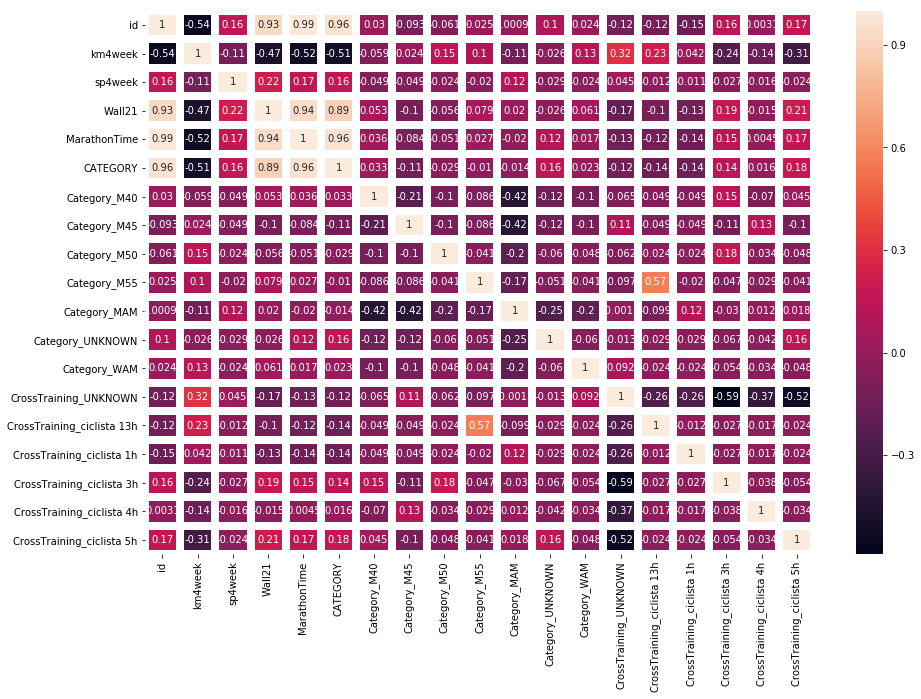

In [139]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=7)